pip install seaborn

pip install numpy==1.23.4

In [1]:
import numpy as np
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
print(tf.__version__)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import backend as C
from tensorflow.keras import regularizers
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.models import load_model,Model
from tensorflow.python.keras.utils import conv_utils
from tensorflow.keras import regularizers, constraints, initializers
import pandas as pd
from tensorflow.keras.layers import GlobalAveragePooling2D
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

2.6.0


In [2]:
train_path=('/LAB/Brain Tumor/Brain Tumor MRI/train')
test_path=('/LAB/Brain Tumor/Brain Tumor MRI/test')
val_path=('/LAB/Brain Tumor/Brain Tumor MRI/val')
batch_size = 32
img_height = 512
img_width = 512
no_of_clases = 4
clsses_name = ['glioma','meninginoma','notumor','pituitary tumor']
input_shape = (img_height,img_width,1)

datagen = ImageDataGenerator(rescale = 1./255,featurewise_center=True,horizontal_flip=False,vertical_flip = False,validation_split = 0.1,featurewise_std_normalization = True)

train_generator = datagen.flow_from_directory(train_path,target_size=(img_height,img_width),batch_size = batch_size, shuffle =True,class_mode = 'categorical')

validation_generator = datagen.flow_from_directory(val_path,target_size=(img_height,img_width),batch_size = batch_size, shuffle =True,class_mode = 'categorical')

print('train classes')
print(train_generator.class_indices)
print('train labels')
print(train_generator.labels)
print('validation clases')
print(validation_generator.class_indices)
print('validation labels')
print(validation_generator.labels)

Found 5617 images belonging to 4 classes.
Found 701 images belonging to 4 classes.
train classes
{'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}
train labels
[0 0 0 ... 3 3 3]
validation clases
{'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}
validation labels
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 

In [3]:
print(len(train_generator))

176


In [6]:
with tf.device('/GPU:1'):
    pretrained_model = tf.keras.applications.InceptionV3(
                    input_shape=(512, 512, 3),
                    include_top=False,
                    weights='imagenet',
                    pooling='avg',
                    )

    pretrained_model.trainable = False

87924736/87910968 [==============================] - 37s 0us/step


In [7]:
inputs = pretrained_model.input
outputs = tf.keras.layers.Dense(4, activation='softmax')(pretrained_model.output)

model = tf.keras.Model(inputs, outputs)
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 512, 512, 3) 0                                            
__________________________________________________________________________________________________
conv2d_117 (Conv2D)             (None, 255, 255, 32) 864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_115 (BatchN (None, 255, 255, 32) 96          conv2d_117[0][0]                 
__________________________________________________________________________________________________
activation_115 (Activation)     (None, 255, 255, 32) 0           batch_normalization_115[0][0]    
______________________________________________________________________________________________

In [8]:
optimizers = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizers,loss='categorical_crossentropy',metrics=['accuracy'])

In [9]:
#callbacks = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=3,restore_best_weights=True)
with tf.device('/GPU:1'):
    history = model.fit(train_generator,validation_data=validation_generator,epochs=25)

/usr/local/lib/python3.8/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.8/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
2024-03-12 13:24:49.481854: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/25


2024-03-12 13:25:03.122960: I tensorflow/stream_executor/cuda/cuda_dnn.cc:381] Loaded cuDNN version 8204


  1/176 [..............................] - ETA: 1:10:09 - loss: 1.3788 - accuracy: 0.3438

2024-03-12 13:25:13.579141: I tensorflow/stream_executor/cuda/cuda_blas.cc:1760] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


176/176 [==============================] - 193s 968ms/step - loss: 0.7085 - accuracy: 0.7591 - val_loss: 0.4850 - val_accuracy: 0.8402
Epoch 2/25
176/176 [==============================] - 90s 506ms/step - loss: 0.4566 - accuracy: 0.8521 - val_loss: 0.3975 - val_accuracy: 0.8759
Epoch 3/25
176/176 [==============================] - 166s 944ms/step - loss: 0.3881 - accuracy: 0.8741 - val_loss: 0.3483 - val_accuracy: 0.8873
Epoch 4/25
176/176 [==============================] - 166s 945ms/step - loss: 0.3455 - accuracy: 0.8857 - val_loss: 0.3187 - val_accuracy: 0.9030
Epoch 5/25
176/176 [==============================] - 166s 944ms/step - loss: 0.3169 - accuracy: 0.8946 - val_loss: 0.3141 - val_accuracy: 0.8987
Epoch 6/25
176/176 [==============================] - 167s 948ms/step - loss: 0.2954 - accuracy: 0.9046 - val_loss: 0.2811 - val_accuracy: 0.9016
Epoch 7/25
176/176 [==============================] - 164s 932ms/step - loss: 0.2812 - accuracy: 0.9040 - val_loss: 0.2807 - val_accurac

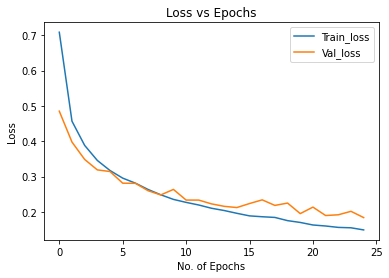

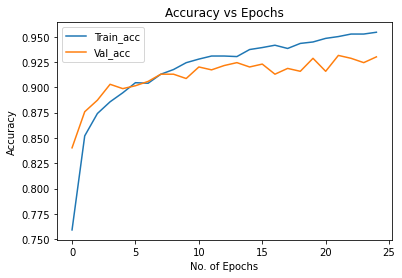

In [10]:
plt.plot(history.history['loss'],label='Train_loss')
plt.plot(history.history['val_loss'],label='Val_loss')
plt.legend()
plt.xlabel('No. of Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.show()


plt.plot(history.history['accuracy'],label = 'Train_acc')
plt.plot(history.history['val_accuracy'],label = 'Val_acc')
plt.legend()
plt.xlabel('No. of Epochs')
plt.ylabel("Accuracy")
plt.title("Accuracy vs Epochs")
plt.show()

In [11]:
test_data = ImageDataGenerator(rescale=1./255)
test_generator = test_data.flow_from_directory(test_path, target_size=(512, 512), batch_size=32, shuffle=False, class_mode="categorical")



Found 705 images belonging to 4 classes.


In [14]:
with tf.device('/GPU:1'):
    predictions = np.argmax(model.predict(test_generator), axis=1)
    matrix = confusion_matrix(test_generator.labels, predictions)
    report= classification_report(test_generator.labels, predictions, target_names=test_generator.class_indices, zero_division=0)

In [15]:
with tf.device('/GPU:1'):
    pred = model.predict(test_generator,verbose=1)
    test_generator_indices = np.argmax(pred,axis=1)

    print(test_generator_indices)

23/23 [==============================] - 18s 790ms/step
[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 1 1 1 0 1 1 1 0
 1 0 0 1 0 1 0 1 0 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 3 1 1 1 3 1 1 1 2 1 2 1 1 1 1 1 0 2 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 3 1 1 1 0 1 1 1 1 3 0 1 1 1 1 1 0 1 1 0 1
 3 1 1 1 1 1 0 1 1 1 0 1 1 1 1 3 1 1 1 1 1 1 1 1 3 1 1 1 1 0 1 1 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 1 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2

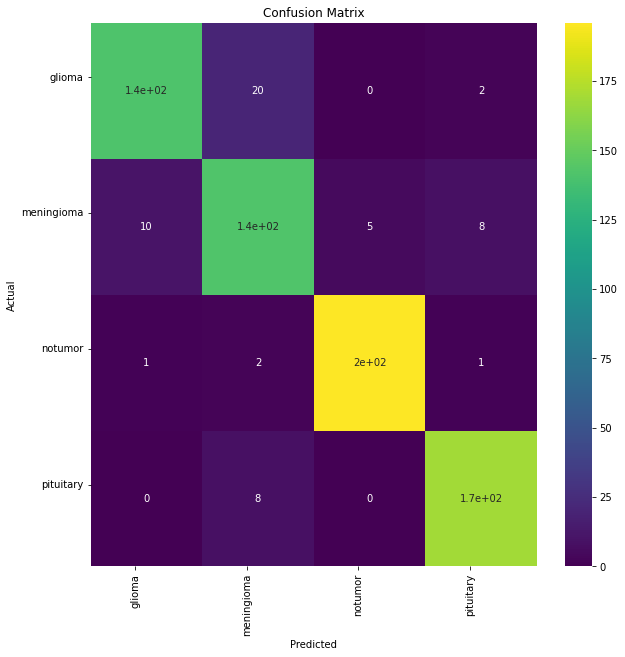

In [16]:
fig = plt.figure(figsize=(10,10))
sns.heatmap(matrix, annot=True, cmap='viridis')
plt.xticks(ticks=np.arange(4) + 0.4, labels=test_generator.class_indices, rotation=90)
plt.yticks(ticks=np.arange(4) + 0.4, labels=test_generator.class_indices, rotation=0)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
fig.savefig("Confusion Matrix",dpi=700)

In [17]:
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

      glioma       0.93      0.87      0.90       163
  meningioma       0.83      0.86      0.84       165
     notumor       0.98      0.98      0.98       200
   pituitary       0.94      0.95      0.95       177

    accuracy                           0.92       705
   macro avg       0.92      0.92      0.92       705
weighted avg       0.92      0.92      0.92       705



In [18]:
!nvidia-smi

Tue Mar 12 15:09:50 2024       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.239.06   Driver Version: 470.239.06   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA RTX A5000    Off  | 00000000:3B:00.0 Off |                  Off |
| 46%   72C    P2    89W / 230W |  24031MiB / 24256MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  NVIDIA RTX A5000    Off  | 00000000:AF:00.0 Off |                  Off |
| 31%   